# **Proyecto 3 IA - Q-learning en el Mundo del Taxi**

- Diryon Mora
- Laura Gonzalez

Se cargan las librerias

In [1]:
%load_ext autoreload
%autoreload 2

import gymnasium as gym
from agents import Agent
from gymnasium.wrappers import TimeLimit
from algoritmos import *
from utils import Episode, Experiment, gym_interpreter1
from plot_utils import Plot

## **Agente**

Se implementa la lógica de un agente basado en el algoritmo de aprendizaje de Q-learning. En el constructor, se inicializan los parámetros esenciales, como la tasa de aprendizaje (`alpha`), y se establece el modo de depuración. El método `update` se encarga de la actualización del modelo del agente tras experimentar una transición de estado a estado.

En cada actualización, el agente utiliza el estado y la acción previos para calcular la estimación de la recompensa total, incorporando el valor máximo de Q para el siguiente estado ponderado por un factor de descuento (`gamma`). El agente ajusta entonces el valor de Q para el par estado-acción actual basándose en esta estimación y en la diferencia entre la estimación y el valor actual de Q. Además, el código contempla la actualización de la política del agente en el estado actual.

El modo de depuración (`debug`) permite imprimir información detallada sobre el proceso de aprendizaje, incluyendo el estado y la acción previos, la recompensa, la estimación, el valor de Q antes y después de la actualización, así como el delta, que representa la diferencia entre la estimación y el valor de Q actual. Este mecanismo facilita la comprensión y seguimiento del proceso de aprendizaje durante la ejecución del agente.

In [3]:
class Q_learning(Agent) :
    '''
    Implements a Q-learning rule.
    '''

    def __init__(self, parameters:dict):
        super().__init__(parameters)
        self.alpha = self.parameters['alpha']
        self.debug = False

    def update(self, next_state, reward, done):
        '''
        Agent updates its model.
        '''
        # obtain previous state
        state = self.states[-1] # Aquí estado previo
        # obtain previous action
        action = self.actions[-1]
        # Find bootstrap
        maxQ = self.max_Q(next_state) 
        estimate = reward + self.gamma * maxQ # Calcula el estimado
        # Obtain delta
        delta = estimate - self.Q[state, action] # Calcula el delta
        # Update Q value
        prev_Q = self.Q[state, action]
        self.Q[state, action] = prev_Q + self.alpha * delta # Actualiza el valor
        # Update policy
        self.update_policy(state) # Actualizar la política en el estado        
        if self.debug:
            print('')
            print(dash_line)
            print(f'Learning log:')
            print(f'state:{state}')
            print(f'action:{action}')
            print(f'reward:{reward}')
            print(f'estimate:{estimate}')
            print(f'Previous Q:{prev_Q}')
            print(f'delta:{delta}')
            print(f'New Q:{self.Q[state, action]}') 

## **Entrenamiento**

Se configura y ejecuta el experimento utilizando el entorno `Taxi-v3` de OpenAI Gym. Se establece un límite máximo de pasos por episodio en 1000. Luego, se crea una instancia del entorno, configurándolo para renderizar en formato de array RGB.

A continuación, se define un agente basado en el algoritmo Q-learning. Se especifican parámetros clave, como el número de estados y acciones en el entorno, el factor de descuento, la probabilidad de exploración y la tasa de aprendizaje. Estos parámetros se utilizan para inicializar una instancia de la clase `Q_learning`.

Posteriormente, se configura un experimento utilizando la clase `Experiment`. Se especifica el entorno, el nombre del entorno (`'Taxi'`), el número máximo de rondas, el número total de episodios, el número de simulaciones y un intérprete de estados (`gym_interpreter1`). El experimento se ejecuta utilizando el método `run_experiment`, donde el agente Q-learning se pasa como parte de la lista de agentes a evaluar.

Running simulations:   0%|          | 0/10 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/2000 [00:00<?, ?it/s]

Average sum of rewards:
 model
Q Learning   -540.9465
Name: reward, dtype: float64

Success percentage:
 model
Q Learning    998.75
Name: done, dtype: float64


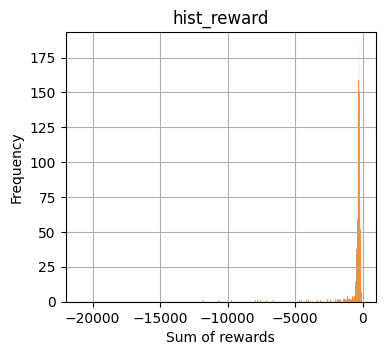

In [10]:
max_rounds = 1000
env = gym.make('Taxi-v3', 
                render_mode='rgb_array'
                )
env = TimeLimit(env, max_episode_steps=max_rounds)
# Create agent
parameters = {
    "nS": env.observation_space.n,
    "nA": env.action_space.n,
    'gamma': 0.8,
    'epsilon': 0.2,
    'alpha': 0.6,
}
agent = Q_learning(parameters=parameters)
experiment = Experiment(environment=env,\
                        env_name='Taxi', \
                        num_rounds=max_rounds, \
                        num_episodes=2000, \
                        num_simulations=10,
                        state_interpreter=gym_interpreter1)
# Test agent
agents = experiment.run_experiment(agents=[agent],\
                                    names=['Q Learning'], \
                                    measures=['hist_reward'], \
                                    learn=True)

## **Pruebas**

Después de entrenar al agente por medio de Q-learning, se realiza el código para evaluar el rendimiento del agente después de desactivar el entrenamiento. Se accede al agente almacenado en la lista de agentes resultantes y se establece la probabilidad de exploración (`epsilon`) en cero, lo que significa que el agente dejará de explorar nuevas acciones de manera aleatoria. Posteriormente, se actualiza la política del agente para cada estado del entorno.

Luego, se configura un nuevo experimento con parámetros ligeramente diferentes, como un límite máximo de pasos por episodio reducido a 404. Se utiliza este nuevo experimento para evaluar el rendimiento del agente Q-learning sin permitir que explore de manera aleatoria. La función `run_experiment` se utiliza con la opción `learn=False` para evaluar el agente sin realizar más aprendizaje. Este bloque de código proporciona una manera de observar cómo se desempeña el agente después de haber desactivado la exploración, lo que puede ser útil para analizar la eficacia del modelo aprendido.


In [12]:
# Shut down exploration
agent: Q_learning = agents[0]
agent.epsilon = 0
for s in range(env.observation_space.n):
    agent.update_policy(s)

Running simulations:   0%|          | 0/1 [00:00<?, ?it/s]

	Running episodes:   0%|          | 0/100 [00:00<?, ?it/s]

Average sum of rewards:
 model
Q Learning    8.07
Name: reward, dtype: float64

Success percentage:
 model
Q Learning    100.0
Name: done, dtype: float64


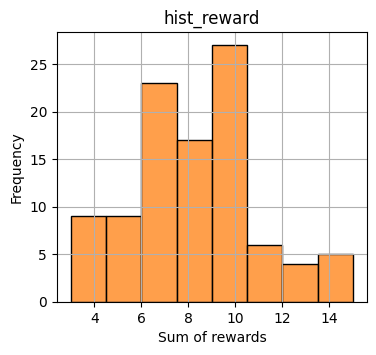

In [26]:
# Create experiment
max_rounds = 404
env = gym.make('Taxi-v3', 
               render_mode='rgb_array'
              )
env = TimeLimit(env, max_episode_steps=max_rounds)
experiment = Experiment(environment=env,\
                 env_name='Taxi', \
                 num_rounds=100, \
                 num_episodes=100, \
                 num_simulations=1,
                 state_interpreter=gym_interpreter1
                 )
# Use stored agents to run test
experiment.run_experiment(
                agents=[agent],\
                names=['Q Learning'], \
                measures=['hist_reward'],\
                learn=False)

## **Recompensas por episodio**

Se utiliza la clase `Episode` para encapsular este episodio, definiendo parámetros esenciales como el entorno, el nombre del entorno, el agente a emplear, el nombre del modelo, el número máximo de rondas, y un intérprete de estados específico Después de instanciar el episodio, se procede a entrenar el agente mediante la simulación de 50 episodios. El resultado del entrenamiento se almacena en un DataFrame (`df`), el cual presumiblemente contiene datos sobre las recompensas y otros aspectos del rendimiento del agente a lo largo de los episodios. Finalmente, se utiliza la clase `Plot` para visualizar las recompensas obtenidas durante el entrenamiento del agente.

  0%|          | 0/50 [00:00<?, ?it/s]

<Axes: xlabel='Episode', ylabel='Total reward'>

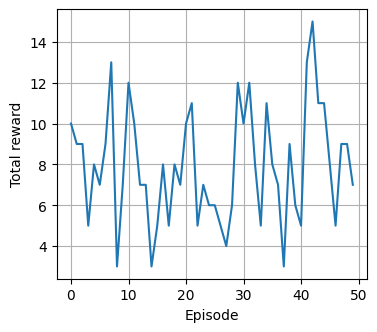

In [31]:
# Create episode
episode = Episode(environment=env, \
                  env_name='Taxi', \
                  agent=agent, \
                  model_name='Q Learning', \
                  num_rounds=100,
                  state_interpreter=gym_interpreter1
                )
# Train agent
df = episode.simulate(num_episodes=50, verbose=0)
# Plot rewards
Plot(df).plot_rewards()

## **Agente Entrenado vs No Entrenado**

### **Agente No entrenado**

Se crea un episodio de interacción entre un agente Q-learning y el entorno `Taxi-v3`. El agente se instancia con parámetros específicos, pero crucialmente, no ha sido entrenado previamente. Luego, se genera un archivo de video que ilustra la interacción del agente sin entrenamiento con el entorno. Este enfoque permite observar el comportamiento inicial del agente antes de cualquier ajuste de políticas o aprendizaje, proporcionando una visión inicial de cómo el agente aborda el problema antes de la optimización de su rendimiento mediante el aprendizaje por refuerzo.

Moviepy - Building video c:\Users\Laura\Documents\1 Universidad\proyecto 3\taxi_sin_entrenar/rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\Laura\Documents\1 Universidad\proyecto 3\taxi_sin_entrenar/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\Laura\Documents\1 Universidad\proyecto 3\taxi_sin_entrenar/rl-video-episode-0.mp4


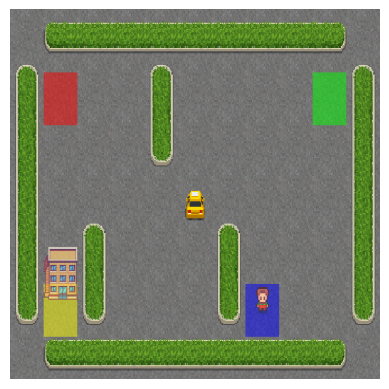

In [15]:
episode = Episode(environment=env, \
                  env_name='Taxi', \
                  agent=Q_learning(parameters), \
                  model_name='Q Learning', \
                  num_rounds=50,
                  state_interpreter=gym_interpreter1
                )
episode.renderize(to_video=True, file='taxi_sin_entrenar')

### **Agente Entrenado**

Se crea un episodio de interacción entre un agente Q-learning y el entorno `Taxi-v3`. El agente se asigna al que fue previamente entrenado. Luego, se genera un archivo de video que ilustra la interacción del agente con entrenamiento en el entorno. 

Esta visualización del episodio proporciona una perspectiva concreta del comportamiento mejorado del agente después de haber sido sometido a un proceso de entrenamiento por refuerzo. Comparando este video con el episodio sin entrenar, se pueden observar las adaptaciones y aprendizajes del agente en la tarea específica del entorno `Taxi-v3`.

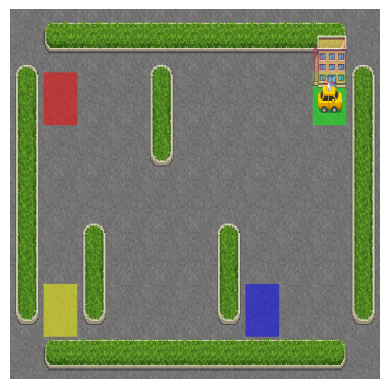

Moviepy - Building video c:\Users\Laura\Documents\1 Universidad\proyecto 3\taxi_entrenado/rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\Laura\Documents\1 Universidad\proyecto 3\taxi_entrenado/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\Laura\Documents\1 Universidad\proyecto 3\taxi_entrenado/rl-video-episode-0.mp4


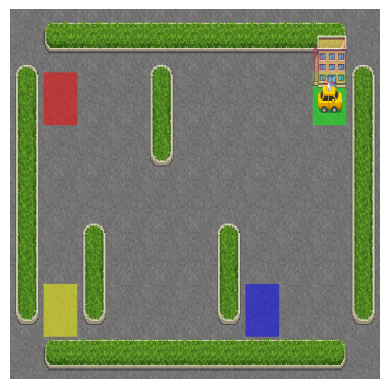

In [17]:
episode = Episode(environment=env, \
                  env_name='Taxi', \
                  agent=agent, \
                  model_name='Q Learning', \
                  num_rounds=100,
                  state_interpreter=gym_interpreter1
                )
episode.renderize(to_video=True, file='taxi_entrenado')